### Treść zadania

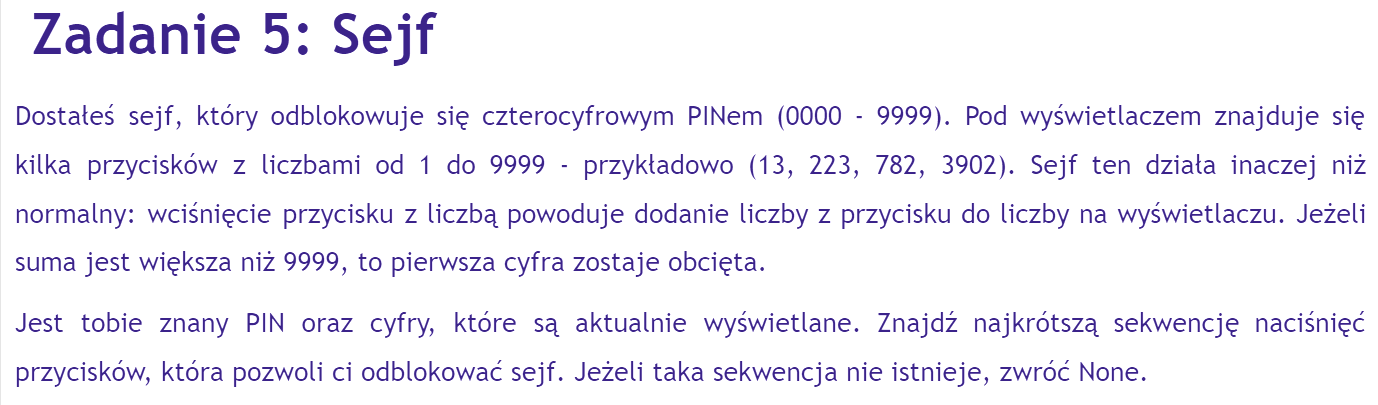

### Omówienie algorytmu

Możemy zauważyć, że mamy $ 10000 $ możliwych wyników. Najłatwiej te wyniki potraktować jako wierzchołki grafu. Samego grafu nie musimy tworzyć, ponieważ, na podstawie wartości przycisków, wiemy zawsze, do którgo wierzchołka należy się udać, więc go sobie za każdym razem wyliczymy. Ponieważ szukamy najkrótszej sekwencji naciśnięć przycisków, wykorzystamy algorytm BFS. Po wyliczeniu nowego wierzchołka, jeżeli nie był on jeszcze wcześniej odwiedzony, dodamy go do kolejki, zaznaczymy jako odwiedzony i zapamiętamy jego rodzica po to, aby później móc odtworzyć kolejność naciśnięć przycisków. Zauważmy, że tablicę rodziców możemy utożsamić z teblicą zapamiętanych odwiedzonych wieżchołków i tak wartość rodzica będzie oznaczała, że odwiedziliśmy ten wierzchołek, a wartość None, że wierzchołek nie był odwiedzony. Następnie, po znalezieniu najkrótszej ścieżki z wierzchołka źródłowego do docelowego (o ile taka istnieje), odtworzymy ją, przy pomocy zapamiętanych wierzchołków rodziców. Zauważmy, że kolejność naciskanych przycisków nie ma znaczenia, więc mozemy odtwarzać ścieżkę od końca.

### Złożoność

###### Obliczeniowa:
$ O(1) $  - zawsze sprawdzimy maksymalnie 10000 wierzchołków, więc liczba operacji jest stała.
###### Pamięciowa:
$ O(1) $  - zawsze tworzymy tablicę o rozmiarze 10000 elementów, więc wielkość jest stała.

### Implementacja

In [1]:
from queue import Queue


def shortest_unlock_sequence(target, current, buttons, *, num_digits=4):
    limit = 10 ** num_digits
    visited = [False] * limit
    parent = [None] * limit
    
    q = Queue()
    q.put(current)
    parent[current] = -1
    
    found_seq = False
    
    # Treat every step as an edge of a graph and a resulting number
    # as a vertex of a graph (use BFS algorithm)
    while not q.empty():
        v = q.get()
        if v == target:
            found_seq = True
            break
        for button in buttons:
            u = (v + button) % limit
            if not parent[u]:
                parent[u] = v
                q.put(u)
            
    # Return None if no unlocking sequence was found
    if not found_seq:
        return None
    
    # Else, restore pressed buttons sequence
    result = []
    u = target
    while u != current:
        result.append((u - parent[u]) % limit)  # This can be negative, thus we use modulo
        u = parent[u]
    
    return result

###### Kilka testów

In [2]:
PIN = 1337  # Unlock PIN number
NUM = 1234  # Currently displayed number

buttons = (13, 223, 782, 3902)

print(shortest_unlock_sequence(PIN, NUM, buttons))

[3902, 3902, 3902, 3902, 3902, 3902, 3902, 782, 223, 223, 223, 223, 223, 223, 223, 223, 223]


In [3]:
num = 1234
for n in [3902, 3902, 3902, 3902, 3902, 3902, 3902, 782, 223, 223, 223, 223, 223, 223, 223, 223, 223]:
    num = (num + n) % 10_000
    print(num)

5136
9038
2940
6842
744
4646
8548
9330
9553
9776
9999
222
445
668
891
1114
1337


In [4]:
def test():
    from random import randint

    PIN = randint(0, 9999)  # Unlock PIN number
    NUM = randint(0, 9999)  # Currently displayed number

    buttons = tuple(randint(0, 9999) for _ in range(4))
    b = [str(button).zfill(4) for button in buttons]

    steps = shortest_unlock_sequence(PIN, NUM, buttons)
    print('PIN:', PIN)
    print(f'''
+--------------------+
|        {str(NUM).zfill(4)}        |
+--------------------+
|{b[0]}|{b[1]}||{b[2]}|{b[3]}|
+--------------------+
''')
    if not steps:
        print('Locked forever !!!')
    else:
        n = NUM
        for step in steps:
            n = (n + step) % 10_000
            print(f'Pressed: {step}  --->  Number: {n}')
        print(f'''
+--------------------+
|      UNLOCKED      |
+--------------------+
|{b[0]}|{b[1]}||{b[2]}|{b[3]}|
+--------------------+
''')

In [5]:
test()

PIN: 3264

+--------------------+
|        1703        |
+--------------------+
|6206|0179||6044|9752|
+--------------------+

Pressed: 9752  --->  Number: 1455
Pressed: 9752  --->  Number: 1207
Pressed: 9752  --->  Number: 959
Pressed: 9752  --->  Number: 711
Pressed: 9752  --->  Number: 463
Pressed: 9752  --->  Number: 215
Pressed: 9752  --->  Number: 9967
Pressed: 6044  --->  Number: 6011
Pressed: 6044  --->  Number: 2055
Pressed: 179  --->  Number: 2234
Pressed: 6206  --->  Number: 8440
Pressed: 6206  --->  Number: 4646
Pressed: 6206  --->  Number: 852
Pressed: 6206  --->  Number: 7058
Pressed: 6206  --->  Number: 3264

+--------------------+
|      UNLOCKED      |
+--------------------+
|6206|0179||6044|9752|
+--------------------+

